In [1]:
import pandas as pd

In [2]:
movie_df = pd.read_table(
    'MovieSummaries/movie.metadata.tsv',
    header=None,
    names=["WikipediaID", "FreebaseID", "MovieName", "MovieReleaseDate", "MovieBoxOfficeRevenue", "MovieRuntime", "MovieLanguages", "MovieCountries", "MovieGenres"]

    )

In [3]:
movie_df.head(5)

,WikipediaID,FreebaseID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,MovieGenres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
pd.to_datetime(movie_df["MovieReleaseDate"]).argmin()

57963

In [5]:
movie_df.iloc[57963]

WikipediaID                                                        1082508
FreebaseID                                                       /m/044ggd
MovieName                                            Roundhay Garden Scene
MovieReleaseDate                                                      1888
MovieBoxOfficeRevenue                                                  NaN
MovieRuntime                                                          0.03
MovieLanguages                                 {"/m/06ppq": "Silent film"}
MovieCountries                              {"/m/07ssc": "United Kingdom"}
MovieGenres              {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...
Name: 57963, dtype: object

In [6]:
with open('MovieSummaries/plot_summaries.txt', 'r') as f:
    plot_summaries = f.readlines()
    

In [7]:
def count_summaries_with_that_word(word):
    count = 0
    for summary in plot_summaries:
        # Delete punctuation
        summary = "".join([c for c in summary if c not in ";?:!.,"])
        summary_words = set(summary.lower().split())
        if word.lower() in summary_words:
            count += 1
    return count

In [8]:
for word in ["love", "space", "communism", "communist", "agent", "secret agents"]:
    print(word, count_summaries_with_that_word(word))

love 10406
space 870
communism 48
communist 318
agent 1660
secret agents 0


In [9]:
print(movie_df.__len__())

81741


In [10]:
# number of movies by genre
movie_df["MovieGenres"].str.replace("{", "").str.replace("}", "").str.replace(" ", "").str.split(",").explode().value_counts().sort_values(ascending=False).head(50)

/tmp/ipykernel_16424/3218828773.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df["MovieGenres"].str.replace("{", "").str.replace("}", "").str.replace(" ", "").str.split(",").explode().value_counts().sort_values(ascending=False).head(50)


"/m/07s9rl0":"Drama"                   34007
"/m/01z4y":"Comedy"                    16349
"/m/02l7c8":"RomanceFilm"              10234
"/m/01g6gs":"Black-and-white"           9094
"/m/02kdv5l":"Action"                   8798
"/m/01jfsb":"Thriller"                  8744
"/m/02hmvc":"ShortFilm"                 8141
"/m/03q4nz":"Worldcinema"               7155
"/m/0lsxr":"CrimeFiction"               6948
"/m/0219x_":"Indie"                     6897
"/m/0jtdp":"Documentary"                5630
"/m/03npn":"Horror"                     5280
"/m/06ppq":"Silentfilm"                 5250
"/m/03k9fj":"Adventure"                 4963
"/m/0hqxf":"FamilyFilm"                 4598
"/m/03btsm8":"Action/Adventure"         4561
"/m/05p553":"Comedyfilm"                4362
"/m/04t36":"Musical"                    4160
"/m/0hcr":"Animation"                   3534
"/m/068d7h":"Romanticdrama"             3372
"/m/02n4kr":"Mystery"                   3195
"/m/06n90":"ScienceFiction"             3052
"/m/01hmnh

In [11]:
words_about_space = {"space", "universe", "galaxy", "star", "moon", "cosmos", "comet"}

In [12]:
def count_summaries_with_those_words(words):
    count = 0
    for summary in plot_summaries:
        # Delete punctuation
        summary = "".join([c for c in summary if c not in ".,?!:;"])
        summary_words = set(summary.lower().split())
        if len(words.intersection(summary_words)) > 0:
            count += 1
    return count

In [13]:
for word in words_about_space:
    print(word, count_summaries_with_that_word(word))

galaxy 104
star 1512
universe 209
comet 56
space 870
moon 446
cosmos 13


In [14]:
print(count_summaries_with_those_words(words_about_space))

2824


In [15]:
from requests import request
from bs4 import BeautifulSoup

In [51]:
r = request("GET", "https://relatedwords.org/relatedto/girl", headers={"User-Agent": "Mozilla/5.0"}, timeout=10, allow_redirects=True, verify=True, stream=True)


In [52]:
soup = BeautifulSoup(r.text, "html.parser")


In [53]:
print(soup.prettify())


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <title>
   Related Words - Find Words Related to Another Word
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/img/favicon.png" rel="icon" type="image/png"/>
  <link href="https://relatedwords.org" rel="canonical"/>
  <!-- <link href='https://fonts.googleapis.com/css?family=Open+Sans' rel='stylesheet' type='text/css'> -->
  <!-- <link href='/css/index.css' rel='stylesheet' type='text/css'> -->
  <!-- -->
  <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <style>
   html, body {
      padding:0;
      margin:0;
      /*font-family: 'Open Sans', sans-serif;*/
      font-family: sans-serif;
      overflow-x: hidden;
    }

    h1, h2 {
      font-size: 30px;
      font-weight: bold;
    }

    a {
      color: #1B72BF;
      text-decoration: 

In [56]:
# Find <script id="preloadedDataEl" type="text/json">
answer = soup.find("script", {"id": "preloadedDataEl"}).text
import json
data = json.loads(answer)
related_words = list([t["word"] for t in data["terms"] if t["score"] > 4])
print(related_words)


['woman', 'female', 'girlfriend', 'child', 'adult female', 'boy', 'maid', 'man', 'daughter', 'young woman', 'little girl', 'female child', 'gal', 'lass', 'adult', 'tomboy', 'schoolgirl']


In [58]:
print(count_summaries_with_those_words(set(related_words)))

22637


In [30]:
print(15588 / len(plot_summaries))

0.3684583746986243


In [44]:
# Scrap wikipedia budget datas
for wiki_id in [26067101]:  # movie_df["WikipediaID"]:
    r = request("GET", f"https://en.wikipedia.org/wiki?curid={wiki_id}", headers={"User-Agent": "Mozilla/5.0"}, timeout=10, allow_redirects=True, verify=True, stream=True)
    soup = BeautifulSoup(r.text, "html.parser")
    print(soup.prettify())
    try:
        budget = soup.find("th", text="Budget").find_next_sibling("td").text
        print(budget)
    except:
        budget = None
    break

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Siam Sunset - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"67e13dab-1050-4730-bbba-38ac4981f682","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Siam_Sunset","wgTitle":"Siam Sunset","wgCurRevisionId":1111265221,"wgRevisionId":1111265221,"wgArticleId":26067101,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from April 2020","Articles with short description","Short description is different from Wikidata","Template film date with 2 r

AttributeError: 'NoneType' object has no attribute 'find_next_sibling'

In [45]:
12*len(movie_df) / 60 / 60

272.47

In [47]:
character_df = pd.read_table("MovieSummaries/character.metadata.tsv", header=None, names=["WikipediaID", "FreebaseID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height", "Actor ethnicity", "Actor name", "Actor age at movie release", "Freebase char/actor map ID", "Freebase character ID", "Freebase actor ID"])
character_df.head(5)

,WikipediaID,FreebaseID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase char/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [50]:
character_df["Movie release date"][character_df["Movie release date"] == "1010-12-12 00:00:00"] = "2010-12-12 00:00:00"
character_df["Movie release date"] = pd.to_datetime(character_df["Movie release date"])

/tmp/ipykernel_16424/1588561626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_df["Movie release date"][character_df["Movie release date"] == "1010-12-12 00:00:00"] = "2010-12-12 00:00:00"


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1010-12-02 00:00:00 present at position 4725

<AxesSubplot: xlabel='Movie release date'>

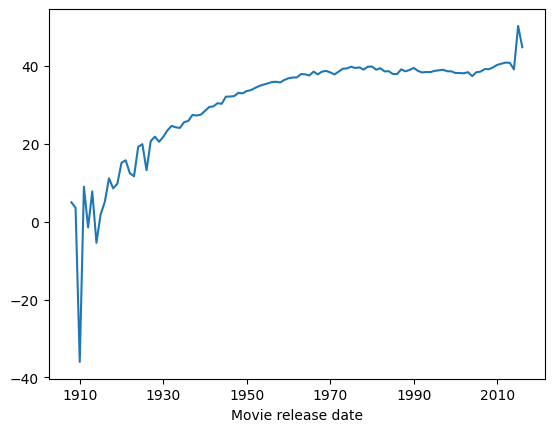

In [59]:
# Mean age of actors over time (in years)

character_df["Actor age at movie release"].groupby(character_df["Movie release date"].str[:4]).mean().plot()

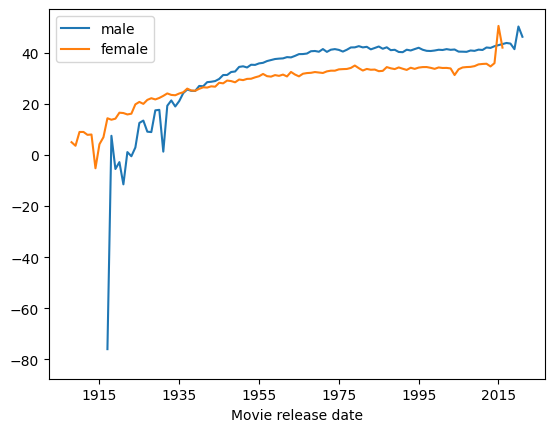

In [61]:
import matplotlib.pyplot as plt
# Mean age of actors over time (in years) by gender
male_actors = character_df[character_df["Actor gender"] == "M"]
female_actors = character_df[character_df["Actor gender"] == "F"]

male_actors["Actor age at movie release"].groupby(male_actors["Movie release date"].str[:4]).mean().plot(label="male")
female_actors["Actor age at movie release"].groupby(female_actors["Movie release date"].str[:4]).mean().plot(label="female")
plt.legend()

[('his', 3499.0), ('her', 2764.0), ('and', 2227.0), ('the', 1799.0), ('to', 1563.0), ('a', 1475.0), ('is', 1259.0), ('of', 1211.0), ('with', 794.0), ('that', 704.0), ('by', 685.0), ('who', 674.0), ('he', 501.0), ('in', 483.0), ('their', 477.0), ('him', 399.0), ('for', 381.0), ('has', 335.0), ('was', 328.0), ('from', 315.0), ('when', 314.0), ('as', 306.0), ('she', 276.0), ('mother', 263.0), ('but', 262.0), ('after', 260.0), ('an', 224.0), ('had', 190.0), ('whose', 157.0), ('killed', 151.0), ('death', 139.0), ('on', 136.0), ('at', 134.0), ('not', 129.0), ('family', 128.0), ('about', 122.0), ('while', 120.0), ('be', 118.0), ('out', 115.0), ('son', 112.0), ('also', 102.0), ('tells', 101.0), ('are', 100.0), ('died', 96.0), ('they', 93.0), ('been', 86.0), ('dies', 84.0), ('because', 84.0), ('up', 80.0), ('brother', 79.0), ('it', 79.0), ('like', 75.0), ('one', 72.0), ('home', 72.0), ('dead', 71.0), ('find', 70.0), ('however', 69.0), ('where', 69.0), ('own', 68.0), ('wants', 68.0), ('them', 68

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, 'his'),
  Text(1, 0, 'her'),
  Text(2, 0, 'and'),
  Text(3, 0, 'the'),
  Text(4, 0, 'to'),
  Text(5, 0, 'a'),
  Text(6, 0, 'is'),
  Text(7, 0, 'of'),
  Text(8, 0, 'with'),
  Text(9, 0, 'that'),
  Text(10, 0, 'by'),
  Text(11, 0, 'who'),
  Text(12, 0, 'he'),
  Text(13, 0, 'in'),
  Text(14, 0, 'their'),
  Text(15, 0, 'him'),
  Text(16, 0, 'for'),
  Text(17, 0, 'has'),
  Text(18, 0, 'was'),
  Tex

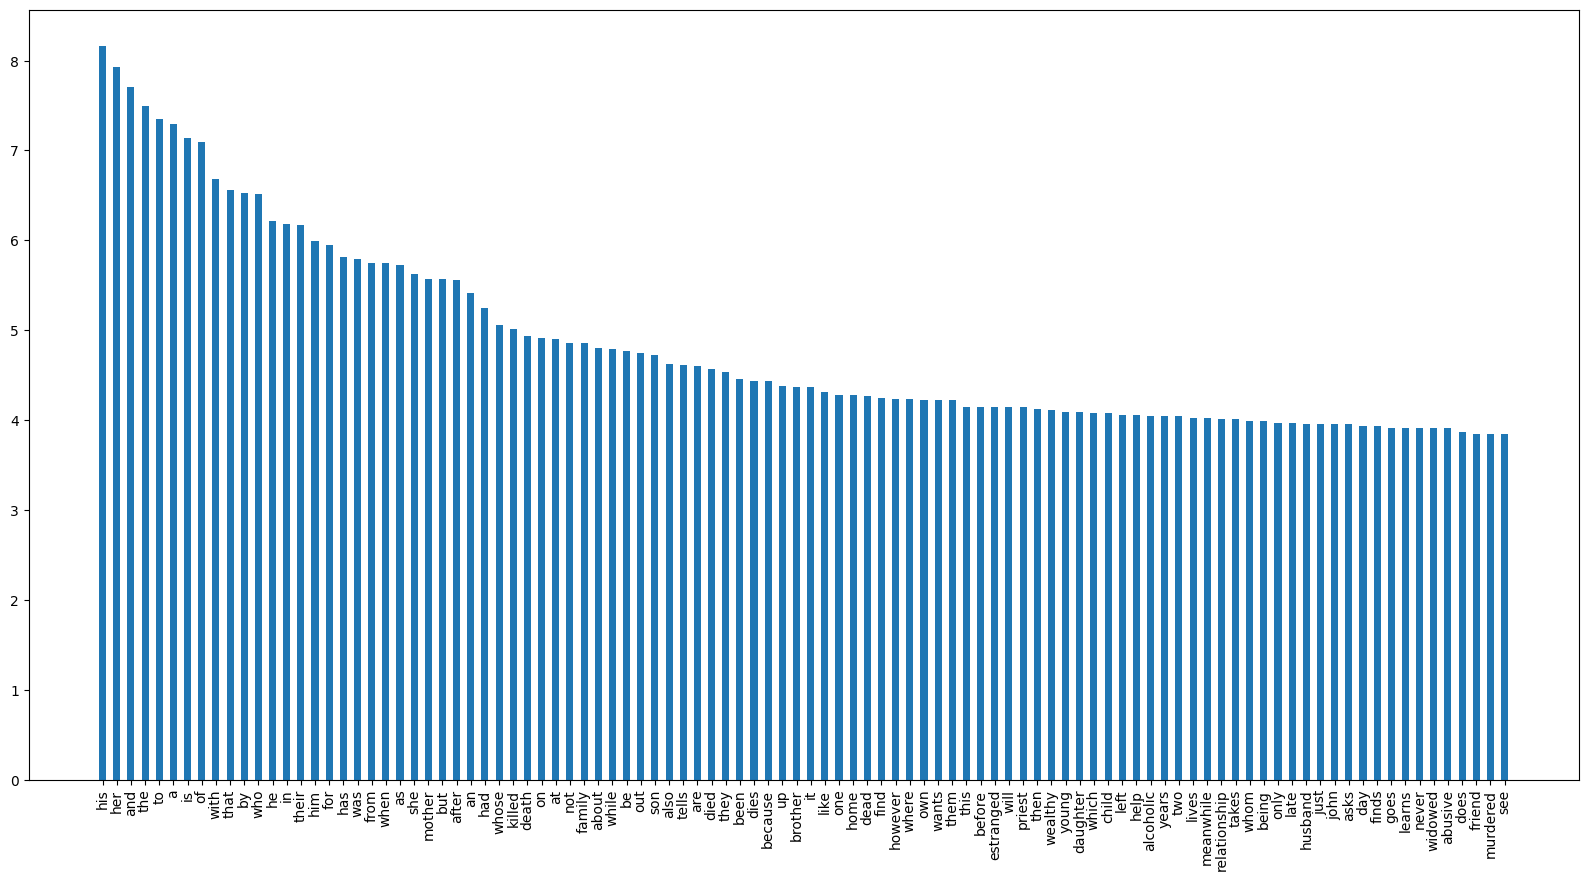

In [79]:
# Import default dictionary
from collections import defaultdict
import math

# count words next to "find"
find_words = defaultdict(float)
for summary in plot_summaries:
    summary = "".join([c for c in summary if c not in ".,?!:;"])
    summary_words = summary.lower().split()
    if "father" in summary_words:
        idx_find = summary_words.index("father")
        if idx_find < len(summary_words) - 1:
            find_words[summary_words[idx_find + 1]] += 1
        if idx_find > 0:
            find_words[summary_words[idx_find - 1]] += 1
        if idx_find < len(summary_words) - 2:
            find_words[summary_words[idx_find + 2]] += 1
        if idx_find > 1:
            find_words[summary_words[idx_find - 2]] += 1
        if idx_find < len(summary_words) - 3:
            find_words[summary_words[idx_find + 3]] += 1
        if idx_find > 2:
            find_words[summary_words[idx_find - 3]] += 1


# Print the 10 most common words
plt.figure(figsize=(20, 10))
top = (sorted(find_words.items(), key=lambda x: x[1], reverse=True)[:100])
print(top)
plt.bar([t[0] for t in top], [math.log(t[1]) for t in top], width=0.5)
plt.xticks(rotation=90)
